<a href="https://colab.research.google.com/github/pyrawn/Data-Preprocessing-Techniques-in-Tortillas-Prices-in-Mexico-Dataset/blob/main/DP_Tortilla-Prices-in-Mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing for Tortilla Prices Analysis in México.

**Authors:**
> Julio Cesar De Aquino Castellanos. </br>
> Lorena Danae Perez Lopez.



Installing Dependencies not included in collab:

In [ ]:
! pip install opendatasets

Libraries importation:

In [ ]:
# Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # This library is for the Kernel Manipulation on the server that I use in google colaboratory
import opendatasets as od # This library is for the Kaggle's API Importation
from scipy.stats import linregress # For linear correlation analysis

API Importation:

In [ ]:
link = 'https://www.kaggle.com/datasets/richave/tortilla-prices-in-mexico'
# No ejecutar otra vez
od.download(link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: juliodeaquino
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/richave/tortilla-prices-in-mexico


100%|██████████| 1.09M/1.09M [00:00<00:00, 84.5MB/s]

Data Import:

In [ ]:
data_dir = '/content/tortilla-prices-in-mexico'
os.listdir(data_dir)

file_name = 'tortilla-prices.csv'
current_directory = os.getcwd()
dataset_directory = 'tortilla-prices-in-mexico'
file_path = os.path.join(data_dir, file_name)
filepath = str(file_path)
df = pd.read_csv('/content/tortilla-prices-in-mexico/tortilla_prices.csv')

/content/tortilla-prices-in-mexico/tortilla-prices.csv


In [ ]:
df.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


In [ ]:
df.tail()

,State,City,Year,Month,Day,Store type,Price per kilogram
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40
284393,Zacatecas,Zacatecas,2024,7,8,Big Retail Store,13.53


There are 284393 rows!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284394 entries, 0 to 284393
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               284394 non-null  object 
 1   City                284394 non-null  object 
 2   Year                284394 non-null  int64  
 3   Month               284394 non-null  int64  
 4   Day                 284394 non-null  int64  
 5   Store type          284394 non-null  object 
 6   Price per kilogram  278004 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 15.2+ MB


In [ ]:
df.describe()

,Year,Month,Day,Price per kilogram
count,284394.000000,284394.000000,284394.000000,278004.000000
mean,2015.252773,6.353024,15.923645,12.203067
std,5.017507,3.418542,8.751436,4.490489
min,2007.000000,1.000000,1.000000,0.000000
25%,2011.000000,3.000000,8.000000,9.600000
50%,2015.000000,6.000000,16.000000,11.230000
75%,2020.000000,9.000000,24.000000,14.090000
max,2024.000000,12.000000,31.000000,31.000000


In [ ]:
df.columns

Index(['State', 'City', 'Year', 'Month', 'Day', 'Store type',
       'Price per kilogram'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
State,0
City,0
Year,0
Month,0
Day,0
Store type,0
Price per kilogram,6390


In this case, we can work transforming column 'Price per kilogram'

In [ ]:
df['Price per kilogram'].mean()

12.203067258025062

In [ ]:
df['Price per kilogram'].fillna(df['Price per kilogram'].mean(), inplace=True)

<ipython-input-18-306b9a08ae60>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price per kilogram'].fillna(df['Price per kilogram'].mean(), inplace=True)


In [ ]:
df.head(10)

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.900000
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,12.203067
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.000000
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.000000
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.000000
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.000000
6,Coahuila,Saltillo,2007,1,10,Mom and Pop Store,12.203067
7,Colima,Colima,2007,1,10,Mom and Pop Store,10.000000
8,Chiapas,Tapachula,2007,1,10,Mom and Pop Store,12.203067
9,Chiapas,Tuxtla Gutiérrez,2007,1,10,Mom and Pop Store,9.200000


In [ ]:
df.duplicated().sum()

0

In this Dataset is not necessary to remove duplicates.

In [ ]:
df['Price per kilogram'] = df['Price per kilogram'].astype(np.float32)

In [ ]:
df.head(10)

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.900000
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,12.203067
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.000000
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.000000
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.000000
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.000000
6,Coahuila,Saltillo,2007,1,10,Mom and Pop Store,12.203067
7,Colima,Colima,2007,1,10,Mom and Pop Store,10.000000
8,Chiapas,Tapachula,2007,1,10,Mom and Pop Store,12.203067
9,Chiapas,Tuxtla Gutiérrez,2007,1,10,Mom and Pop Store,9.200000


In [ ]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [ ]:
df.head(10)

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.900000,2007-01-10
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,12.203067,2007-01-10
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.000000,2007-01-10
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.000000,2007-01-10
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.000000,2007-01-10
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.000000,2007-01-10
6,Coahuila,Saltillo,2007,1,10,Mom and Pop Store,12.203067,2007-01-10
7,Colima,Colima,2007,1,10,Mom and Pop Store,10.000000,2007-01-10
8,Chiapas,Tapachula,2007,1,10,Mom and Pop Store,12.203067,2007-01-10
9,Chiapas,Tuxtla Gutiérrez,2007,1,10,Mom and Pop Store,9.200000,2007-01-10


Outliers detection and filtration:

In [ ]:
Q1 = df['Price per kilogram'].quantile(0.25)
Q3 = df['Price per kilogram'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_without_outliers = df[(df['Price per kilogram'] >= lower_bound) & (df['Price per kilogram'] <= upper_bound)]

In [ ]:
df_without_outliers.count()

,0
State,266869
City,266869
Year,266869
Month,266869
Day,266869
Store type,266869
Price per kilogram,266869
Date,266869
Date-Continuos,266869




---

**Exploratory Data Analysis(EDA):**

<Axes: xlabel='Price per kilogram', ylabel='Count'>

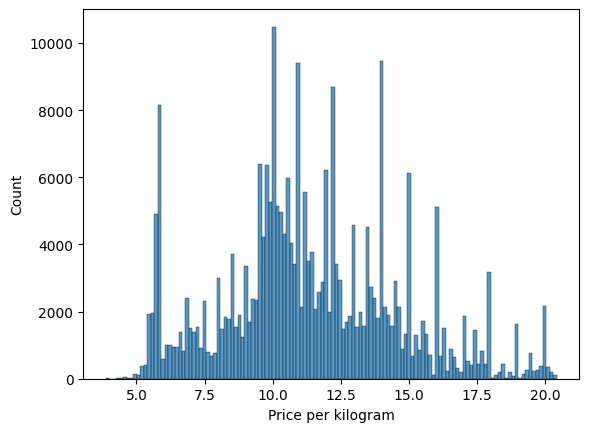

In [ ]:
sns.histplot(df_without_outliers['Price per kilogram'])

<Axes: ylabel='Price per kilogram'>

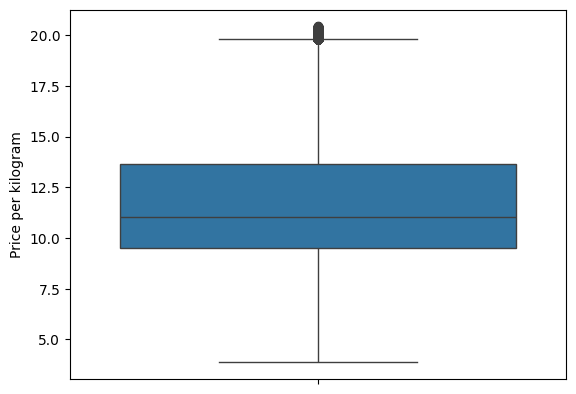

In [ ]:
sns.boxplot(df_without_outliers['Price per kilogram'])

<Axes: xlabel='count', ylabel='State'>

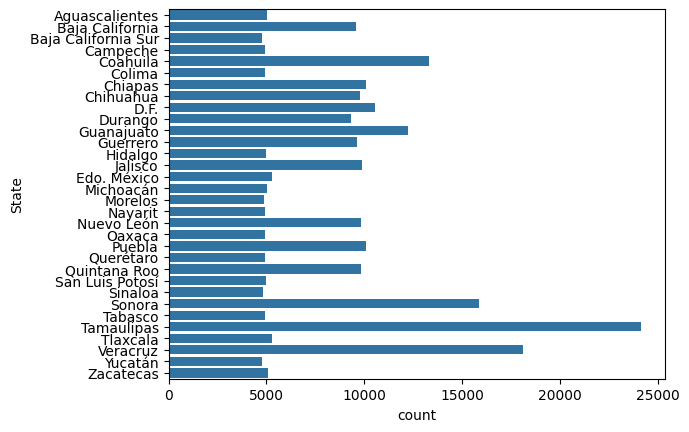

In [ ]:
sns.countplot(df_without_outliers['State'])



---

**Bivariate Analysis:**

To do a scatter diagram, we need to transform Date as a Continuos variable.

In [ ]:
df['Date-Continuos']=df['Date'].astype('int64')//10**9

In [ ]:
df.tail()

,State,City,Year,Month,Day,Store type,Price per kilogram,Date,Date-Continuos
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50,2024-07-08,5.455342e+07
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60,2024-07-08,5.455342e+07
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33,2024-07-08,5.455342e+07
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40,2024-07-08,5.455342e+07
284393,Zacatecas,Zacatecas,2024,7,8,Big Retail Store,13.53,2024-07-08,5.455342e+07


In [ ]:
sample = df_without_outliers.iloc[::1330]
sample.head()

,State,City,Year,Month,Day,Store type,Price per kilogram,Date,Date-Continuos
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9,2007-01-10,3.704932e+07
1330,Coahuila,Piedras Negras,2007,2,12,Mom and Pop Store,9.5,2007-02-12,3.713973e+07
2660,Chihuahua,Chihuahua,2007,3,13,Mom and Pop Store,9.0,2007-03-13,3.721918e+07
3990,Durango,Gómez Palacio,2007,4,16,Mom and Pop Store,8.5,2007-04-16,3.731233e+07
5320,Hidalgo,Pachuca,2007,5,17,Mom and Pop Store,8.5,2007-05-17,3.739726e+07


<Axes: xlabel='Date', ylabel='Price per kilogram'>

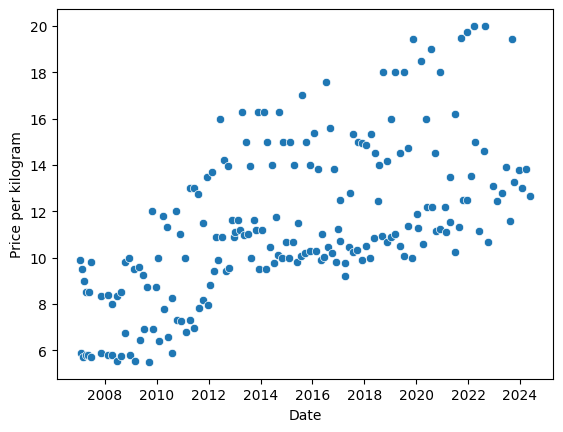

In [ ]:
sns.scatterplot(x='Date', y='Price per kilogram', data=sample)

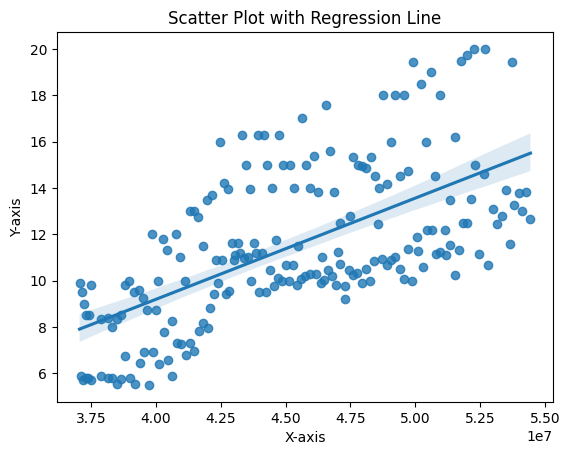

In [ ]:
sns.regplot(data=sample, x='Date-Continuos', y='Price per kilogram', marker='o')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(sample['Year'], sample['Price per kilogram'])

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard Error:", std_err)

Slope: 0.43585521032123786
Intercept: -866.6404612289839
R-squared: 0.3917661475015876
P-value: 2.932143340730966e-23
Standard Error: 0.038497944747721384


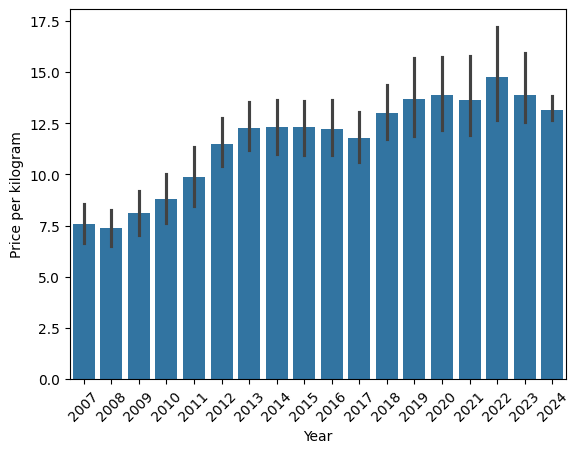

In [ ]:
sns.barplot(data=sample, x='Year', y='Price per kilogram')

plt.xticks(rotation=45)
plt.show()

<Axes: >

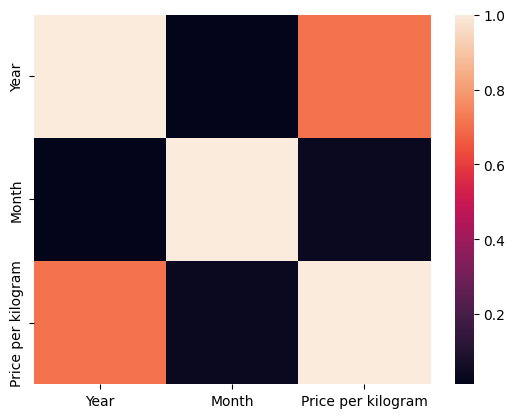

In [ ]:
sns.heatmap(df[['Year','Month','Price per kilogram']].corr())

# Bibliography:
https://www.kaggle.com/datasets/richave/tortilla-prices-in-mexico